## File parser - section 2
Another type of ASCII-formats is given through structured key:value-like file formats (e.g., .XML or .json files). These have well documented and standardized file formats, which in turn allows developers to exchange data in many different tools and software.

Working with `XML` files in python is a big mess. I would always recommend to use the `xmltodict` module, unless you run into performance issues. Using `xmltodict`, the `XML` file is transformed into a python `dict`ionary.
`json` files are by definition python `dict`ionaries.


In this notebook, we again want to plot XRD data. This time, the content is written in a `xrdml` file; a community standard for XRD data sharing that follows the XML file specification

- import `xmltodict` and `matplotlib`
- define the `filePath` variable pointing on a `xrdml` file
- read the content into `fileString`
- create `xrdDict` using `xmltodict.parse()` on the file content
- print out `xrdDict`

In [2]:
filePath = '../data/2023_0219_MB1_10.xrdml'

import xmltodict
import matplotlib.pyplot as plt

with open(filePath, 'r') as file:
   fileString = file.read()


xrdDict = xmltodict.parse(fileString)
print(xrdDict)

{'xrdMeasurements': {'@xmlns': 'http://www.xrdml.com/XRDMeasurement/1.3', '@xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance', '@xsi:schemaLocation': 'http://www.xrdml.com/XRDMeasurement/1.3 http://www.xrdml.com/XRDMeasurement/1.3/XRDMeasurement.xsd', '@status': 'Completed', 'comment': {'entry': ['Configuration=Geologie Standard, Owner=Illit, Creation date=2/23/2010 3:37:51 PM', 'Goniometer=PW3050/60 (Theta/Theta); Minimum step size 2Theta:0.001; Minimum step size Omega:0.001', 'Sample stage=Transmission Spinner PW3064/60; Minimum step size Phi:0.1', 'Diffractometer system=XPERT-PRO', 'Measurement program=High Quality 55 min 2,5-70, Owner=Illit, Creation date=1/10/2012 11:09:42 AM']}, 'sample': {'@type': 'To be analyzed', 'id': '0219_MB1_10', 'name': None, 'preparedBy': 'Illit'}, 'xrdMeasurement': {'@measurementType': 'Scan', '@status': 'Completed', '@sampleMode': 'Reflection', 'comment': {'entry': 'High Quality Scan - poor texture - 20 sec/step - 2.5 - 70 °2Theta'}, 'usedWavelen

It's not easy to navigate through such a massive `dict`ionary. The `json` module has a handy function to print out `dict`ionaries with an indented structure.
- import json
- use `json.dumps()` on the `dict` using the `indent=True` argument to print it out

In [3]:
import json
print(json.dumps(xrdDict, indent=4))

{
    "xrdMeasurements": {
        "@xmlns": "http://www.xrdml.com/XRDMeasurement/1.3",
        "@xmlns:xsi": "http://www.w3.org/2001/XMLSchema-instance",
        "@xsi:schemaLocation": "http://www.xrdml.com/XRDMeasurement/1.3 http://www.xrdml.com/XRDMeasurement/1.3/XRDMeasurement.xsd",
        "@status": "Completed",
        "comment": {
            "entry": [
                "Configuration=Geologie Standard, Owner=Illit, Creation date=2/23/2010 3:37:51 PM",
                "Goniometer=PW3050/60 (Theta/Theta); Minimum step size 2Theta:0.001; Minimum step size Omega:0.001",
                "Sample stage=Transmission Spinner PW3064/60; Minimum step size Phi:0.1",
                "Diffractometer system=XPERT-PRO",
                "Measurement program=High Quality 55 min 2,5-70, Owner=Illit, Creation date=1/10/2012 11:09:42 AM"
            ]
        },
        "sample": {
            "@type": "To be analyzed",
            "id": "0219_MB1_10",
            "name": null,
            "prepare

Using `dict.keys()` reveals all subcategories of a `dict` and can further be used to navigate through nested `dict`ionaries.
Looping over the keys of a `dict` can be used to print out key:value pairs

- loop over `xrdDict['xrdMeasurements'].keys()` to print out the nested key:value pairs using `json.dumps()`

In [4]:
print(xrdDict.keys())
print(xrdDict['xrdMeasurements'].keys())

for key in xrdDict['xrdMeasurements'].keys():
    print(key)
    print(json.dumps(xrdDict['xrdMeasurements'][key],indent=4))
    print('----------------')

dict_keys(['xrdMeasurements'])
dict_keys(['@xmlns', '@xmlns:xsi', '@xsi:schemaLocation', '@status', 'comment', 'sample', 'xrdMeasurement'])
@xmlns
"http://www.xrdml.com/XRDMeasurement/1.3"
----------------
@xmlns:xsi
"http://www.w3.org/2001/XMLSchema-instance"
----------------
@xsi:schemaLocation
"http://www.xrdml.com/XRDMeasurement/1.3 http://www.xrdml.com/XRDMeasurement/1.3/XRDMeasurement.xsd"
----------------
@status
"Completed"
----------------
comment
{
    "entry": [
        "Configuration=Geologie Standard, Owner=Illit, Creation date=2/23/2010 3:37:51 PM",
        "Goniometer=PW3050/60 (Theta/Theta); Minimum step size 2Theta:0.001; Minimum step size Omega:0.001",
        "Sample stage=Transmission Spinner PW3064/60; Minimum step size Phi:0.1",
        "Diffractometer system=XPERT-PRO",
        "Measurement program=High Quality 55 min 2,5-70, Owner=Illit, Creation date=1/10/2012 11:09:42 AM"
    ]
}
----------------
sample
{
    "@type": "To be analyzed",
    "id": "0219_MB1_10",

The xrdml format stores measured intensities (y-axis) as an array.
Corresponding 2Theta values (x-axis) need to be calculated using `StartPosition`, `EndPosition`, and the number of datapoints.

- access the intensity values via `xrdDict['xrdMeasurements'][...][...] ...` and assign them to `intensities` variable
- `intensities` is a text string. Create a list `y`, loop over the individual measurements within `intensities` using `split()` and, in each iteration, `append()` the value as `int()` to the `y` list.
- grab the `startPosition`/`endPosition` 2Theta values as `xMin`/`xMax`, respectively, via `xrdDict['xrdMeasurements'][...][...] ...`.
Note that the `positions` key keeps an array, over which we need to loop in order to find the right entry where `"@axis": "2Theta"`
- The x-array is now generated using the `xMin` and `xMax` variables in combination with the number of measurements. Create a list in which the number of values matches that of `y`, and the minimum and maximum values are `xMin` and `xMax`, respectively.

In [5]:
dataPoints = xrdDict['xrdMeasurements']['xrdMeasurement']['scan']['dataPoints']

for child in dataPoints['positions']:

    if child['@axis'] == '2Theta':
        xMin = float(child['startPosition'])
        xMax = float(child['endPosition'])
        xRange = xMax - xMin


y = dataPoints['intensities']['#text']
y = [float(val) for  val in y.split(' ')]
print(y)
xStep = xRange/(len(y)-1)
x = [i*xStep +xMin for i in range(len(y))]
print(x)




[1123.0, 1086.0, 1058.0, 1002.0, 1039.0, 963.0, 960.0, 969.0, 898.0, 944.0, 869.0, 864.0, 829.0, 817.0, 773.0, 715.0, 724.0, 707.0, 676.0, 664.0, 637.0, 681.0, 601.0, 567.0, 521.0, 542.0, 467.0, 428.0, 401.0, 372.0, 390.0, 338.0, 395.0, 353.0, 338.0, 340.0, 284.0, 305.0, 309.0, 274.0, 300.0, 321.0, 299.0, 313.0, 299.0, 307.0, 332.0, 322.0, 307.0, 281.0, 321.0, 335.0, 307.0, 303.0, 314.0, 327.0, 302.0, 335.0, 317.0, 237.0, 314.0, 284.0, 297.0, 290.0, 259.0, 319.0, 246.0, 307.0, 319.0, 282.0, 274.0, 284.0, 312.0, 267.0, 279.0, 274.0, 291.0, 291.0, 278.0, 246.0, 296.0, 264.0, 280.0, 290.0, 286.0, 289.0, 306.0, 283.0, 284.0, 276.0, 313.0, 321.0, 274.0, 316.0, 274.0, 295.0, 309.0, 313.0, 259.0, 289.0, 267.0, 288.0, 283.0, 276.0, 306.0, 294.0, 297.0, 286.0, 313.0, 324.0, 263.0, 257.0, 259.0, 283.0, 267.0, 265.0, 287.0, 270.0, 292.0, 291.0, 298.0, 275.0, 283.0, 254.0, 311.0, 270.0, 263.0, 313.0, 271.0, 280.0, 255.0, 273.0, 312.0, 262.0, 291.0, 317.0, 265.0, 225.0, 275.0, 287.0, 264.0, 273.0, 

Plot the spectrum

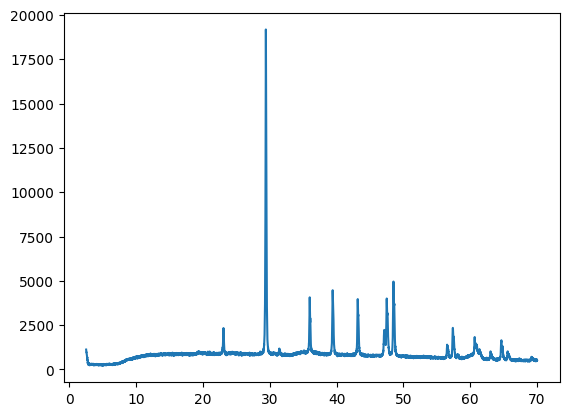

In [6]:
plt.plot(x,y)
plt.show()

In a next step, we want to wrap the code necessary to parse an individual `xrdml` file into a function, which takes the filepath as an input argument and returns `x`, `y`, and the sample id.

In [7]:

def parse_xrdml(filePath):
    with open(filePath, 'r') as file:
        fileString = file.read()
    xrdDict = xmltodict.parse(fileString)

    id = xrdDict['xrdMeasurements']['sample']['id']

    dataPoints = xrdDict['xrdMeasurements']['xrdMeasurement']['scan']['dataPoints']
    y = dataPoints['intensities']['#text']
    y = [float(val) for  val in y.split(' ')]

    for child in dataPoints['positions']:

        if child['@axis'] == '2Theta':
            xMin = float(child['startPosition'])
            xMax = float(child['endPosition'])
            xRange = xMax - xMin
            xStep = xRange/(len(y)-1)
            x = [i*xStep +xMin for i in range(len(y))]

            return x,y, id

In this code block, we want to display three XRD spectra within a single plot.
- create a `list` containing the 3 filenames
- iterate over the `list`, invoke the function in every step to receive `x`,`y` and the sample id to plot the respective spectrum, taking the sample id as label
- create a legend & axis labels
- Please place `plt.show()` outside/behind the loop, in order to receive 1 plot with 3 spectra instead of 3 individual plots.

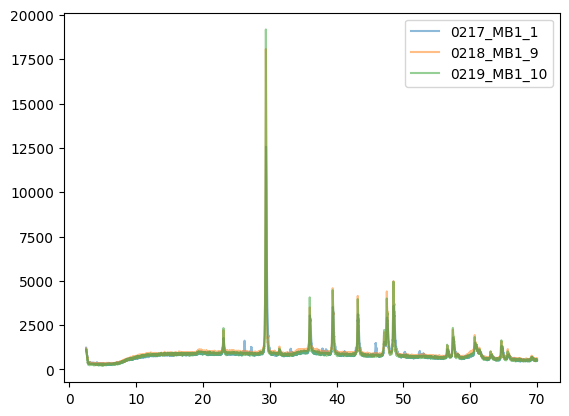

In [8]:
files = [
"../data/2023_0217_MB1_1.xrdml",
"../data/2023_0218_MB1_9.xrdml",
"../data/2023_0219_MB1_10.xrdml",
]

for file in files:
    x,y, id = parse_xrdml(file)
    plt.plot(x,y,
             alpha=0.5,
             label=id)

plt.legend()
plt.show()

In a final step, please offset the individual spectra with respect to the y-axis, in order to make the peaks more identifiable.
- import numpy as np
- copy the last code block
- create a `OFFSET` variable, set it to `0`
- transform `y` into a numpy array (which allows to apply vertorized transformations, e.g., y=y+100 which adds 100 to every entry in the array)
- add `OFFSET` to `y`
- increase OFFSET by a fixed value at the end of every iteration cycle


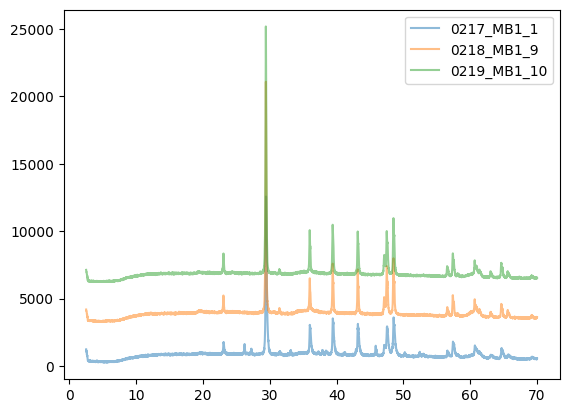

In [9]:
import numpy as np
files = [
"../data/2023_0217_MB1_1.xrdml",
"../data/2023_0218_MB1_9.xrdml",
"../data/2023_0219_MB1_10.xrdml",
]

OFFSET = 0
for file in files:
    x,y, id = parse_xrdml(file)
    plt.plot(x,np.array(y)+OFFSET,
             alpha=0.5,
             label=id)

    OFFSET+=3000
plt.legend()
plt.show()